In [1]:
import math

import matplotlib as mpl
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc
from cycler import cycler

mpl.rcParams['ps.usedistiller'] = 'xpdf' 

plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

monochrome=(cycler('color', sns.color_palette("husl", 8))*2+(cycler('marker', ['v', 's', "o"])*7)[0:16])
plt.rc('axes', prop_cycle=monochrome)

pd.options.display.max_rows = 999

Setting rcParams['ps.usedistiller'] requires ghostscript.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
masterdata = pd.read_csv("/content/drive/MyDrive/GMCDE/experiments/dependencies/2021-12-26-19-03_Dependencies_python/Dependencies_python.csv")

In [5]:
masterdata.head(10)

,genId,dim,x,y,z
0,linear-l-2-0.0,2,0.370132,0.370132,0.0
1,linear-l-2-0.0,2,0.309181,0.309181,0.0
2,linear-l-2-0.0,2,0.749607,0.749607,0.0
3,linear-l-2-0.0,2,0.049915,0.049915,0.0
4,linear-l-2-0.0,2,0.362571,0.362571,0.0
5,linear-l-2-0.0,2,0.163360,0.163360,0.0
6,linear-l-2-0.0,2,0.169693,0.169693,0.0
7,linear-l-2-0.0,2,0.363915,0.363915,0.0
8,linear-l-2-0.0,2,0.901755,0.901755,0.0
9,linear-l-2-0.0,2,0.458704,0.458704,0.0


In [6]:
masterdata["genId"] = [x.split("-")[1] for x in masterdata["genId"]]

In [7]:
masterdata.head(10)

,genId,dim,x,y,z
0,l,2,0.370132,0.370132,0.0
1,l,2,0.309181,0.309181,0.0
2,l,2,0.749607,0.749607,0.0
3,l,2,0.049915,0.049915,0.0
4,l,2,0.362571,0.362571,0.0
5,l,2,0.163360,0.163360,0.0
6,l,2,0.169693,0.169693,0.0
7,l,2,0.363915,0.363915,0.0
8,l,2,0.901755,0.901755,0.0
9,l,2,0.458704,0.458704,0.0


In [8]:
masterdata["genId"].unique()

array(['l', 'dl_0.25', 'lp_2.0', 'si_1.0', 'si_5.0', 'hc', 'hcg', 'hs',
       'cr', 'st', 'ho', 'zi'], dtype=object)

In [9]:
masterdata["dim"].unique()

array([2, 3])

In [10]:
genIds = ['l','dl_0.25','lp_2.0','si_1.0', 'si_5.0','hc','hcg','hs','cr','st','ho','zi']

In [11]:
titles = {
    "l": "Linear (L)",
    "dl_0.25": "Double Linear (Dl)",
    "lp_2.0": "Linear Period (Lp)",
    "si_1.0": "Sine (P=1) (S1)",
    "si_5.0": "Sine (P=5) (S5)",
    "hc": "Hypercube (Hc)",
    "hcg": "Hypercube Graph (HcG)",
    "hs": "Hypersphere(Hs)",
    "cr": "Cross (C)",
    "st": "Star (St)",
    "ho": "Hourglass (H)",
    "zi": "Z inversed (Zi)",
}

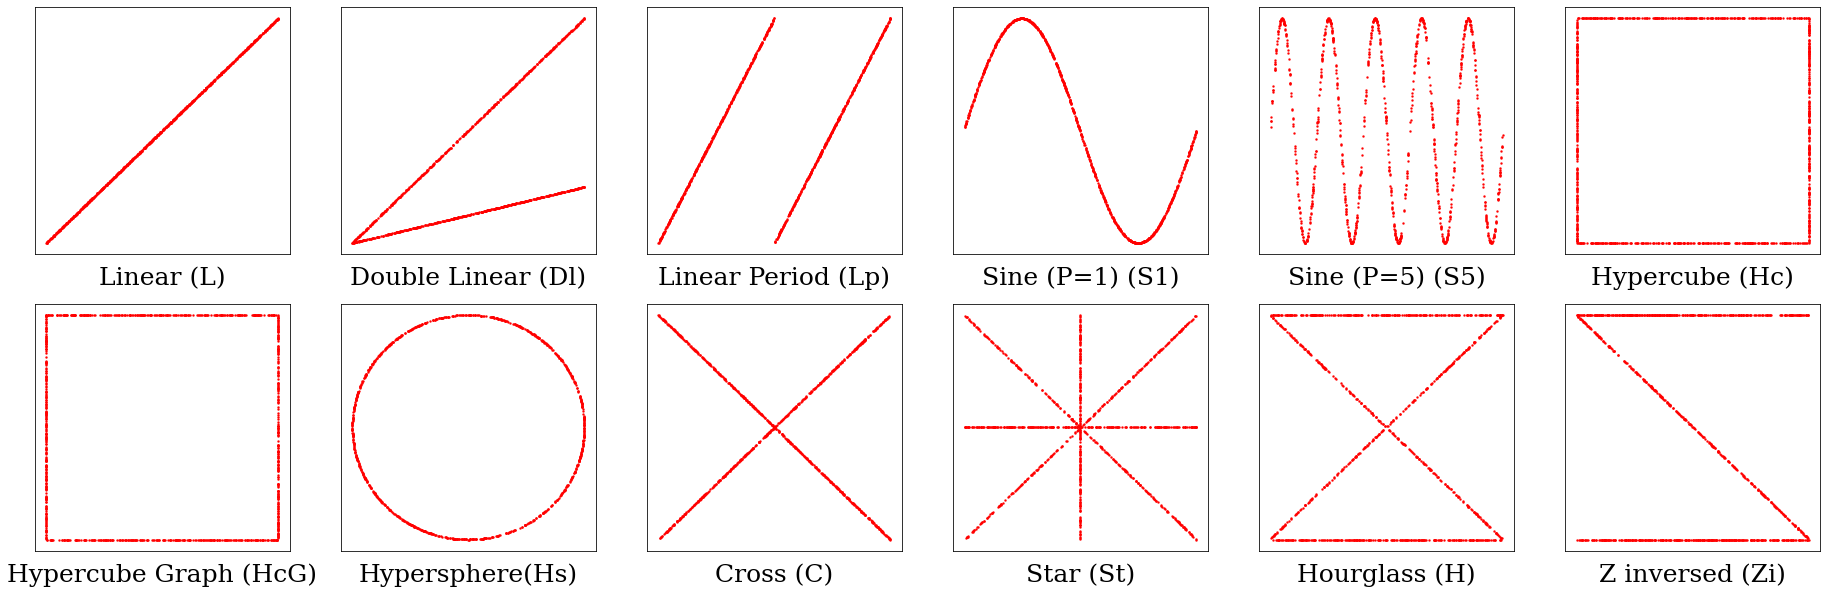

In [15]:
fig = plt.figure(figsize=(32,10))
for i, genId in enumerate(genIds):
  ax = fig.add_subplot(2, 6, i+1)
  data_2d = masterdata[(masterdata["dim"] == 2) & (masterdata["genId"] == genId)]
  xs = data_2d["x"].to_numpy()
  ys = data_2d["y"].to_numpy()
  ax.axes.xaxis.set_visible(False)
  ax.axes.yaxis.set_visible(False)
  ax.scatter(xs, ys, s =4, c = "red")
  plt.title(titles[genId], y=-0.15)
  plt.savefig("2d", bbox_inches='tight')

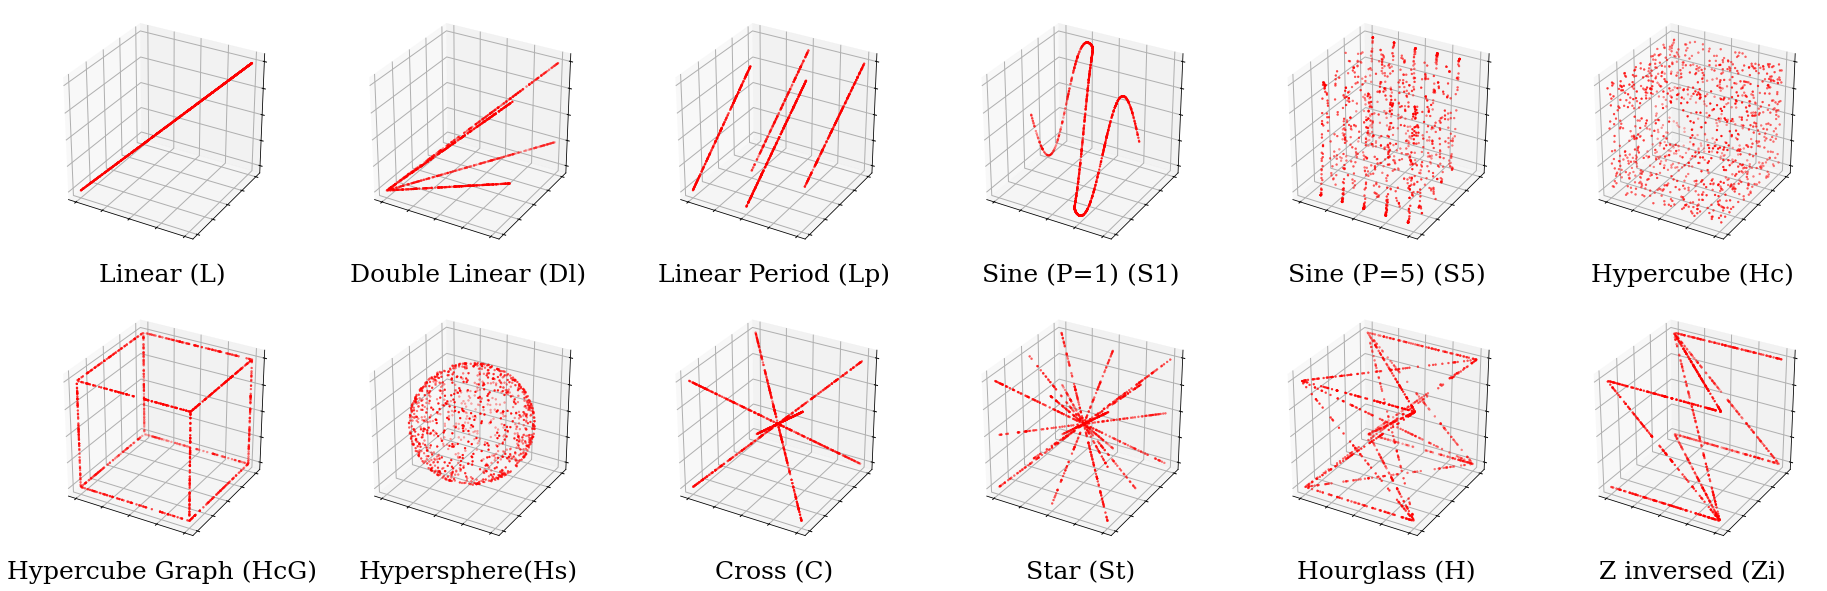

In [16]:
fig = plt.figure(figsize=(32,10))
for i, genId in enumerate(genIds):
  ax = fig.add_subplot(2, 6, i+1, projection = '3d')
  data_3d = masterdata[(masterdata["dim"] == 3) & (masterdata["genId"] == genId)]
  xs = data_3d["x"].to_numpy()
  ys = data_3d["y"].to_numpy()
  zs = data_3d["z"].to_numpy()
  ax.set_xticklabels([])
  ax.set_yticklabels([])
  ax.set_zticklabels([])
  ax.scatter(xs, ys,zs, s = 4, c = "red")
  plt.title(titles[genId], y=-0.15)
  plt.savefig("3d", bbox_inches='tight')